# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откройте файлы и изучите их.

Загрузим необходимые библиотеки.

In [108]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import mean_absolute_error

import numpy as np

from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer

from sklearn.dummy import DummyRegressor

In [109]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Загрузим данные.

In [110]:
df_train = pd.read_csv('/Users/alexander/Documents/Python/DataSets/Восстановление золота из руды /gold_recovery_train_new.csv')
df_test = pd.read_csv('/Users/alexander/Documents/Python/DataSets/Восстановление золота из руды /gold_recovery_test_new.csv')
df_full = pd.read_csv('/Users/alexander/Documents/Python/DataSets/Восстановление золота из руды /gold_recovery_full_new.csv')

Соберем словарь с данными.

In [111]:
all_df = {'Исходные данные': df_full, 
            'Обучающая выборка': df_train, 
            'Тестовая выборка': df_test}


Изучим данные.

In [112]:
# транспонируем для удобства просмотра

for df_name, df in all_df.items():
    print('Первые 5 строк танспонированных', df_name)
    
    display(df.head(5).set_index('date'). T)
    

Первые 5 строк танспонированных Исходные данные


date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.055403,6.029369,6.055926,6.047977,6.148599
final.output.concentrate_pb,9.889648,9.968944,10.213995,9.977019,10.142511
final.output.concentrate_sol,5.507324,5.257781,5.383759,4.858634,4.939416
final.output.concentrate_au,42.192020,42.701629,42.657501,42.689819,42.774141
final.output.recovery,70.541216,69.266198,68.116445,68.347543,66.927016
final.output.tail_ag,10.411962,10.462676,10.507046,10.422762,10.360302
final.output.tail_pb,0.895447,0.927452,0.953716,0.883763,0.792826
final.output.tail_sol,16.904297,16.634514,16.208849,16.532835,16.525686
final.output.tail_au,2.143149,2.224930,2.257889,2.146849,2.055292
primary_cleaner.input.sulfate,127.092003,125.629232,123.819808,122.270188,117.988169


Первые 5 строк танспонированных Обучающая выборка


date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.055403,6.029369,6.055926,6.047977,6.148599
final.output.concentrate_pb,9.889648,9.968944,10.213995,9.977019,10.142511
final.output.concentrate_sol,5.507324,5.257781,5.383759,4.858634,4.939416
final.output.concentrate_au,42.192020,42.701629,42.657501,42.689819,42.774141
final.output.recovery,70.541216,69.266198,68.116445,68.347543,66.927016
final.output.tail_ag,10.411962,10.462676,10.507046,10.422762,10.360302
final.output.tail_pb,0.895447,0.927452,0.953716,0.883763,0.792826
final.output.tail_sol,16.904297,16.634514,16.208849,16.532835,16.525686
final.output.tail_au,2.143149,2.224930,2.257889,2.146849,2.055292
primary_cleaner.input.sulfate,127.092003,125.629232,123.819808,122.270188,117.988169


Первые 5 строк танспонированных Тестовая выборка


date,2016-09-01 00:59:59,2016-09-01 01:59:59,2016-09-01 02:59:59,2016-09-01 03:59:59,2016-09-01 04:59:59
primary_cleaner.input.sulfate,210.800909,215.392455,215.259946,215.336236,199.099327
primary_cleaner.input.depressant,14.993118,14.987471,12.884934,12.006805,10.682530
primary_cleaner.input.feed_size,8.080000,8.080000,7.786667,7.640000,7.530000
primary_cleaner.input.xanthate,1.005021,0.990469,0.996043,0.863514,0.805575
primary_cleaner.state.floatbank8_a_air,1398.981301,1398.777912,1398.493666,1399.618111,1401.268123
primary_cleaner.state.floatbank8_a_level,-500.225577,-500.057435,-500.868360,-498.863574,-500.808305
primary_cleaner.state.floatbank8_b_air,1399.144926,1398.055362,1398.860436,1397.440120,1398.128818
primary_cleaner.state.floatbank8_b_level,-499.919735,-499.778182,-499.764529,-499.211024,-499.504543
primary_cleaner.state.floatbank8_c_air,1400.102998,1396.151033,1398.075709,1400.129303,1402.172226
primary_cleaner.state.floatbank8_c_level,-500.704369,-499.240168,-502.151509,-498.355873,-500.810606


In [113]:
for df_name, df in all_df.items():
    print(df_name)
    print('')
    print(df.info())
    print('')

Исходные данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 n

Признак date имеет неверный формат, исправим не этапе предоработки данных.

Напишем функцию для подсчета пропусков и вывода их в процентах.

In [114]:
def missing_values(data):
    total = data.isnull().sum() #создаем series с суммами пропусков
    percent = (data.isnull().sum()/ len(data.isnull())) #создаем series с долями пропусков
    missing_data = pd.concat([total, percent], axis=1, keys=['всего', 'процент пропусков']) #собираем обе series в DataFrame
    missing_data = missing_data.sort_values('всего', ascending=False) #сортируем по столбцу количества пропусков
    missing_data['процент пропусков'] = missing_data['процент пропусков']* 100 #переводим в %
    display('Количество строк с пропусками:', missing_data[missing_data['процент пропусков'] > 0].shape[0]) #считакм все с пропускам
    display(missing_data[missing_data['процент пропусков'] > 1]) #отображаем лишь те что больше 1
    

In [115]:
for name, df in all_df.items():
    print(name, ':', df.shape)
    print('')
    print(missing_values(df))
    print('')

Исходные данные : (19439, 87)



'Количество строк с пропусками:'

63

,всего,процент пропусков
secondary_cleaner.output.tail_sol,1748,8.992232
rougher.input.floatbank11_xanthate,453,2.330367
rougher.state.floatbank10_e_air,436,2.242914
primary_cleaner.output.concentrate_sol,370,1.903390
secondary_cleaner.state.floatbank2_a_air,220,1.131745
final.output.concentrate_sol,211,1.085447


None

Обучающая выборка : (14149, 87)



'Количество строк с пропусками:'

62

,всего,процент пропусков
secondary_cleaner.output.tail_sol,1605,11.343558
rougher.state.floatbank10_e_air,436,3.081490
rougher.input.floatbank11_xanthate,428,3.024949
primary_cleaner.output.concentrate_sol,286,2.021344
secondary_cleaner.state.floatbank2_a_air,217,1.533677
final.output.concentrate_sol,211,1.491271
rougher.input.feed_size,144,1.017740


None

Тестовая выборка : (5290, 53)



'Количество строк с пропусками:'

12

,всего,процент пропусков


None



Проверим на дубликаты.

In [116]:
for name, df in all_df.items():
    print('Число дубликатов в', name, ':', df.duplicated().sum())
    print('')
    

Число дубликатов в Исходные данные : 0

Число дубликатов в Обучающая выборка : 0

Число дубликатов в Тестовая выборка : 0



### Проверка формулы расчета

Проверим, что эффективность обогащения рассчитана правильно. Вычислем её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.


Технологический процесс:

![alternatvie text](https://pictures.s3.yandex.net/resources/viruchka_1576238830.jpg)

1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

Эффективность обогащения рассчитывается по формуле:

![alternatvie text](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Описание данных:

Технологический процесс

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

Xanthate **— ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация

Rougher tails — отвальные хвосты

Float banks — флотационная установка

Cleaner process — очистка

Rougher Au — черновой концентрат золота

Final Au — финальный концентрат золота

Параметры этапов

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи

Исходя из условий задачи, формулы и технологического процесса, нам для расчета эффективности обогащения чернового концентрата 'rougher.output.recovery' необходимы следующие переменны:
- Rougher feed (F — доля золота в сырье/концентрате до флотации/очистки)
- Rougher tails (T — доля золота в отвальных хвостах после флотации/очистки)
- Rougher Au (C — доля золота в концентрате после флотации/очистки)

Найдем переменные содержащие в себе rougher (флотация), ведь все переменные касаются именно этого этапа, и au (золото), так же потому что именно этот элемент нас интересует

In [117]:
display([col for col in df_full.columns if 'rougher' and 'au' in col])

['final.output.concentrate_au',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au']

Подходят следующие переменные:
- Rougher feed - rougher.input.feed_au (F — доля золота в сырье/концентрате до флотации/очистки)
- Rougher tails - rougher.output.tail_au (T — доля золота в отвальных хвостах после флотации/очистки)
- Rougher Au - rougher.output.concentrate_au (C — доля золота в концентрате после флотации/очистки)
Создадим переменные для расчета:

In [118]:
F = df_train['rougher.input.feed_au']
C = df_train['rougher.output.concentrate_au']
T = df_train['rougher.output.tail_au']

df_train['rougher.output.recovery.calc'] = (C * (F - T)) / (F * (C - T)) * 100 # вычисляем эффективность
display(df_train[['rougher.output.recovery', 
                  'rougher.output.recovery.calc']].head(15)) #выведем имеющийся и расчитанные столбцы

,rougher.output.recovery,rougher.output.recovery.calc
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,87.650868,87.650868


Пока выглядит что расчет правильный. Расчитаем MAE.

In [119]:
print('MAE:', mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery.calc']))

MAE: 9.73512347450521e-15


Показатель MAE крайне низок, что говорит что 'rougher.output.recovery' по тестовой выборке был расчитан верно. 

### Анализ признаков недоступных в тестовой выборке

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [120]:
for df_name, df in all_df.items():
    print(df_name)
    print('')
    print(df.shape)
    print('')

Исходные данные

(19439, 87)

Обучающая выборка

(14149, 88)

Тестовая выборка

(5290, 53)



Найдем какие строки совпадают.

In [121]:
display(set(df_train.columns).intersection(set(df_test.columns)))
print('Количество совпадающих строк:', len(set(df_train.columns).intersection(set(df_test.columns))))


{'date',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

Количество совпадающих строк: 53


Получается, что все 53 признака из обучающей выборке есть в тестовой, найдем отсутсвующие 35 признаков.

In [122]:
for column in df_train.columns:
    columns_df = []
    if column not in set(df_train.columns).intersection(set(df_test.columns)):
        columns_df.append(column)
        print(columns_df)

['final.output.concentrate_ag']
['final.output.concentrate_pb']
['final.output.concentrate_sol']
['final.output.concentrate_au']
['final.output.recovery']
['final.output.tail_ag']
['final.output.tail_pb']
['final.output.tail_sol']
['final.output.tail_au']
['primary_cleaner.output.concentrate_ag']
['primary_cleaner.output.concentrate_pb']
['primary_cleaner.output.concentrate_sol']
['primary_cleaner.output.concentrate_au']
['primary_cleaner.output.tail_ag']
['primary_cleaner.output.tail_pb']
['primary_cleaner.output.tail_sol']
['primary_cleaner.output.tail_au']
['rougher.calculation.sulfate_to_au_concentrate']
['rougher.calculation.floatbank10_sulfate_to_au_feed']
['rougher.calculation.floatbank11_sulfate_to_au_feed']
['rougher.calculation.au_pb_ratio']
['rougher.output.concentrate_ag']
['rougher.output.concentrate_pb']
['rougher.output.concentrate_sol']
['rougher.output.concentrate_au']
['rougher.output.recovery']
['rougher.output.tail_ag']
['rougher.output.tail_pb']
['rougher.output.ta

В тестовой выборке отсутсвуют данные по:
- output -  параметры продукта
- calculation - расчётные характеристики
- rougher.output.recovery - эффективность обогащения чернового концентрата (целевой признак)
- final.output.recovery - эффективность обогащения финального концентрата (целевой признак)

Все параметры типа: float64

### Предоработка данных

#### Изменение типов данных

На этапе изучения данных мы обнаружили, что по всем датасетам столюец 'date' имеет неверный формат (object), исправим это.

In [123]:
for df_name, df in all_df.items():
    df['date'] = pd.to_datetime(df['date'])
    print(df['date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


#### Удаление пропусков

Изучим данные для понимания как лучше заполнить пропуски.

In [124]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery.calc
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14

In [125]:
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery.calc
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.6292

In [126]:
df_train['date'].head(15)

0    2016-01-15 00:00:00
1    2016-01-15 01:00:00
2    2016-01-15 02:00:00
3    2016-01-15 03:00:00
4    2016-01-15 04:00:00
5    2016-01-15 05:00:00
6    2016-01-15 06:00:00
7    2016-01-15 07:00:00
8    2016-01-15 08:00:00
9    2016-01-15 09:00:00
10   2016-01-15 10:00:00
11   2016-01-15 11:00:00
12   2016-01-15 12:00:00
13   2016-01-15 13:00:00
14   2016-01-15 14:00:00
Name: date, dtype: datetime64[ns]

Данные меняются ежечастно. Визуальный анализ данных показывает, что характер изменения в рамках часа не такой большой, соседние значения по столбцу всегда очень близки по значению, проверим это через код. Сравнивать будем со стандартным отклонением, для понимания размерности. 

In [127]:
columns_test = df_train.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery']).columns.tolist() 

test = df_train.dropna().reset_index()

print('Тестовая выборка') 
print() 

for col in columns_test:
    for i in range(len(col)-1):
        differences = []
        dif = test[col][i] - test[col][i+1]
        differences.append(dif)
        differences = pd.DataFrame(differences)
   
    print('Название столбца:', col)
    print('Средняя разница между соседними значениями:', differences.mean().item()) 
    print('Стандартное отклонение столбца:',np.std(test[col]))
    print()

Тестовая выборка

Название столбца: final.output.concentrate_ag
Средняя разница между соседними значениями: 0.13760578955837488
Стандартное отклонение столбца: 1.3404300728560117

Название столбца: final.output.concentrate_pb
Средняя разница между соседними значениями: 0.8060166509946161
Стандартное отклонение столбца: 1.5895941477704254

Название столбца: final.output.concentrate_sol
Средняя разница между соседними значениями: 0.18414179714810475
Стандартное отклонение столбца: 2.8421762229164114

Название столбца: final.output.concentrate_au
Средняя разница между соседними значениями: -0.8211025587147205
Стандартное отклонение столбца: 4.17108069532209

Название столбца: final.output.tail_ag
Средняя разница между соседними значениями: 0.054405445529113194
Стандартное отклонение столбца: 2.3348383366624104

Название столбца: final.output.tail_pb
Средняя разница между соседними значениями: -0.0033860678805242017
Стандартное отклонение столбца: 0.9564987039337057

Название столбца: fina

Показатель standatd diviation крайне низок для соседних значений по всем столбцам, потому для заполнения пропусков можно применить метод линейной интерполяции данных. 


При визуальном изучении данных смутили 0 и 100 по ряду столбцов, изучим это.

In [128]:
columns_test = df_train.drop(columns=['date', 'rougher.output.recovery.calc']).columns.tolist()

target_variables = ['rougher.output.recovery', 'final.output.recovery']

all_df_no_test = {'Исходные данные': df_full, 
            'Обучающая выборка': df_train}

for df_name, df in all_df_no_test.items():
    df = df.reset_index()
    print()
    print(df_name)
    print()
    for col in columns_test:
          
        if df[col].loc[df[col] == 0].count() > 0:
            count_0 = df[col].loc[df[col] == 0].count()
            
            print('Наименование признака:', col)
            print('Количество 0:',count_0)
        
        if df[col].loc[df[col] == 100].count() > 0:
            count_100 = df[col].loc[df[col] == 100].count()
            print('Количество 100:',count_100)
            



Исходные данные

Наименование признака: final.output.concentrate_ag
Количество 0: 98
Наименование признака: final.output.concentrate_pb
Количество 0: 98
Наименование признака: final.output.concentrate_sol
Количество 0: 98
Наименование признака: final.output.concentrate_au
Количество 0: 98
Наименование признака: final.output.recovery
Количество 0: 98
Количество 100: 91
Наименование признака: final.output.tail_ag
Количество 0: 91
Наименование признака: final.output.tail_pb
Количество 0: 91
Наименование признака: final.output.tail_sol
Количество 0: 91
Наименование признака: final.output.tail_au
Количество 0: 91
Наименование признака: primary_cleaner.input.depressant
Количество 0: 10
Наименование признака: primary_cleaner.output.concentrate_ag
Количество 0: 108
Наименование признака: primary_cleaner.output.concentrate_pb
Количество 0: 108
Наименование признака: primary_cleaner.output.concentrate_sol
Количество 0: 108
Наименование признака: primary_cleaner.output.concentrate_au
Количество 

In [129]:
df_full.loc[df_full['rougher.output.recovery'] == 100]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16226,2018-03-12 02:59:59,5.413548,9.389648,8.731319,45.270618,100.0,0.0,0.0,0.0,0.0,173.823067,7.965209,7.250000,1.095700,7.925334,9.014648,10.577148,36.306431,0.0,0.0,0.0,0.0,1699.629716,-500.045329,1697.334190,-499.304085,1697.236986,-498.082396,1697.702278,-498.659397,38377.036752,2475.307923,2475.135294,1.0,0.01,0.01,602.530096,80.935301,0.01,0.01,12.473082,7.004836,12.472844,7.000643,0.01,0.01,0.01,0.01,100.0,5.508833,0.633728,20.904297,1.352458,1401.025067,-299.969743,1200.283097,-500.112237,1099.738995,-500.172098,1055.157485,-501.345895,1048.288019,-500.564688,998.719519,-500.884236,0.0,0.0,0.0,0.0,34.895656,-500.111815,27.001680,-499.981758,32.987361,-500.213935,18.953672,-500.112761,22.999183,-503.125579,14.941823,-500.352978,17.987796,-500.438815,11.963555,-499.982857,12.015338,-500.051956
16227,2018-03-12 03:59:59,5.413548,9.389648,8.731319,45.270618,100.0,0.0,0.0,0.0,0.0,173.810317,7.989731,7.250000,1.109543,7.925334,9.014648,10.577148,36.306431,0.0,0.0,0.0,0.0,1702.288246,-500.448778,1701.297120,-499.892598,1699.641147,-500.640245,1699.06060

In [130]:
columns_test = df_train.drop(columns=['date', 'rougher.output.recovery.calc', ]).columns.tolist()

target_variables = ['rougher.output.recovery', 'final.output.recovery']


for df_name, df in all_df_no_test.items():
    df = df.reset_index()
    print()
    print(df_name)
    print()
    for col in columns_test:
        if df[col].loc[df[col] == 100].count() > 0:
            count_100 = df[col].loc[df[col] == 100].count()
            print('Наименование признака:', col)
            print('Количество 100:',count_100)
            



Исходные данные

Наименование признака: final.output.recovery
Количество 100: 91
Наименование признака: rougher.output.recovery
Количество 100: 5

Обучающая выборка

Наименование признака: final.output.recovery
Количество 100: 75
Наименование признака: rougher.output.recovery
Количество 100: 5


Выбивающихся из логики данных не так много, не понимая всего процесса и точного наименования признаков, не возьмусь за переработку 0 и 100.

Значений 100 возникает в целевом признаке и ряде других обощающих показателей, когда на выходе процесса получаем чистое золото, что мне кажется невозможно (к огромному сожалению мне кажется нет ни 1 процесса со 100% эффективностью). Возможно это технологическая ошибка, и целевый показатели считаются как 100% минус примеси, когда данные по примисям не попадают в определенный момент времени в систему,  показатель фиксируется на уровне 100%, потому что нечего вычитать. Выбивающихся из логики данных не так много, не понимая всего процесса и точного наименования признаков, не возьмусь за переработку 0 и 100.

Удалим NaN значения по признакам методом интерполяции.

In [131]:
for df_name, df in all_df.items():
    df.interpolate(method='pad', limit_direction='forward', inplace=True)
    print(df_name)
    print('Число пропусков:', df.isna().sum().sum())
    print()

Исходные данные
Число пропусков: 0

Обучающая выборка
Число пропусков: 0

Тестовая выборка
Число пропусков: 0



Пропусков нет.

#### Добавление целевых признаков в тестовую выборку

Добавим в тестовую выборку целевые признаки из исходных данных по дате.

In [132]:
display('df_test', df_test.shape)

df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')
display('df_test после добавления целевых признаков', df_test.shape)

'df_test'

(5290, 53)

'df_test после добавления целевых признаков'

(5290, 55)

Проверим ни образовалось ли пропусков.

In [133]:
cols = ['rougher.output.recovery', 'final.output.recovery']

#full_copy.dropna(subset=cols, inplace=True)

df_test[['rougher.output.recovery', 'final.output.recovery']].isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

In [134]:
df_test[['rougher.output.recovery', 'final.output.recovery']].head()

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


In [135]:
df_train[['rougher.output.recovery', 'final.output.recovery']].head()

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


Целевые признаки добавлены.

#### Выравнивание обучающей и тестовой выборки по числу признаков

Необходимо чтобы количество признаков в тестовой и обучающей выборках были равны. Оставим в df_train только те признаки (колонки), которые есть df_test.

In [136]:
print('Размер выборки df_train:', df_train.shape)

df_train = df_train[df_test.columns.tolist()]

print('Размер выборки df_train после удаления призаков:', df_train.shape)


Размер выборки df_train: (14149, 88)
Размер выборки df_train после удаления призаков: (14149, 55)


В тестовой и обучающей выборке осталось по 53 признака.

## Анализ данных

### Исследование изменения концентрации элементов на каждом этапе

Найдем нужные нам переменные по исходным данным. Вспомним набор всех столбцов.

In [137]:
display(df_full.columns.tolist())

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.s

Нас интересуют следующие металы:
- Au - золото
- Ag - серебро
- Pb - свинец

В рамках следующих этапов:
- первичное сырье загружаемое во флотационную установку 
    - rougher.input.feed_ag
    - rougher.input.feed_pb
    - rougher.input.feed_au
- показатели чернового концетрата после флотации 
    - rougher.output.concentrate_ag
    - rougher.output.concentrate_pb
    - rougher.output.concentrate_au
- показатели чернового концетрата после первичной и вторичной очистки
    - primary_cleaner.output.concentrate_ag',
    - primary_cleaner.output.concentrate_pb
    - primary_cleaner.output.concentrate_au
- показатели финального чернового концетрата после всех этапов очистки
    - final.output.concentrate_ag
    - final.output.concentrate_pb
    - final.output.concentrate_au

Все наименования признаков каждого этапа имеют одинаковый прифекс, а тип метала является суфиксом, что поможет написать красивую функцию для построения графиков. Воспользуюмся диаграмой ядерной оценки плотности (Kernel Density Estimation) для каждого из этапов и ящиком с усами.

In [138]:
# создаем словарь с названиями элементов 
metals = {'золото': 'au', 'серебро': 'ag', 'свинец': 'pb'}


# затемним фон
sns.set_style('darkgrid')

# 'met' как аргумент функции, принимает название металла, получаемое из словаря 
def plot_concentrate(met):
    
    # путем подставления в конец суфикса - метала получается соотвесвующая переменная
    
    colums = ['rougher.input.feed_'+ met, 'rougher.output.concentrate_'+ met, 
            'primary_cleaner.output.concentrate_'+ met, 'final.output.concentrate_'+ met]
    
    # дадим нормальные наименования переменным для легенд по графикам
    
    labels = ['Первичное сырье '+ met, 'ЧК после флотации '+ met, 
            'ЧК после очистки '+ met, 'Финальный концетрат '+ met]
      
    
    df_full[labels] = df_full[colums]
    
    df_full[labels].plot(kind='kde', figsize=(12,8), grid=True).legend(bbox_to_anchor= (-0.05,1))
    
    # дадим нормальные наименования переменным для легенд по графикам
    
    plt.title('Концентрация  ' + str(met).title() + ' на этапах очитки', fontsize=16) 
    
    plt.figure(figsize=(13,8))
    plt.ylabel('Плотность')
    
    sns.boxplot(data=df_full[labels], orient="h")
    
    

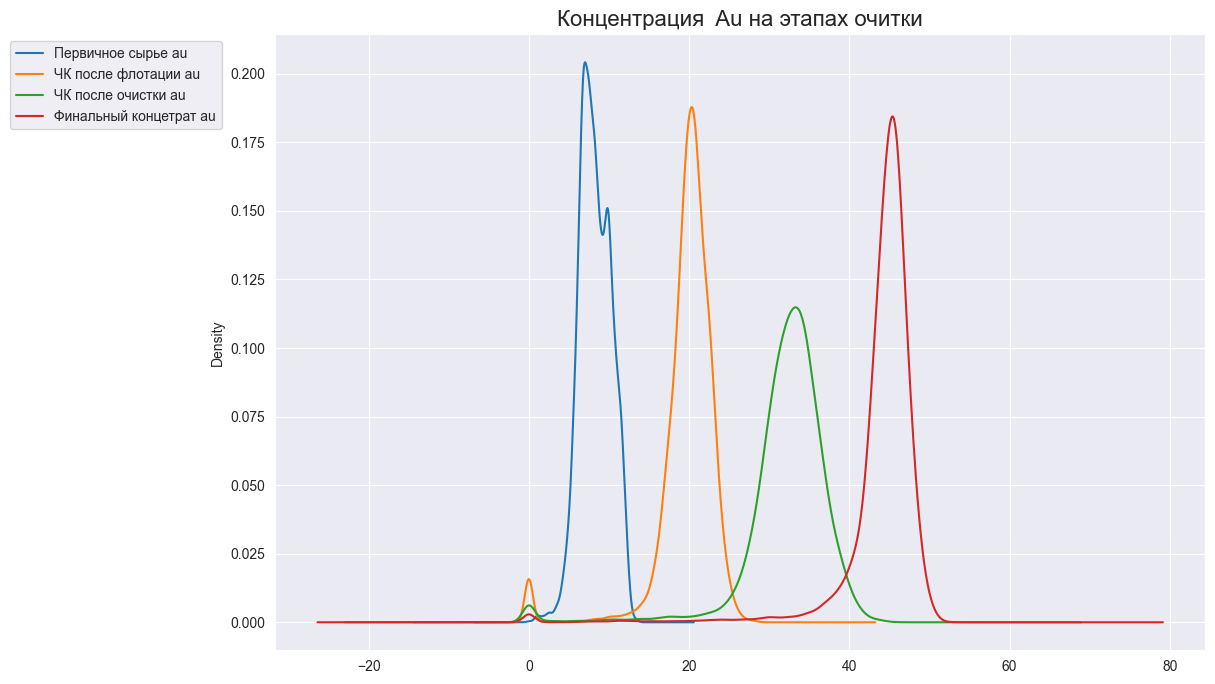

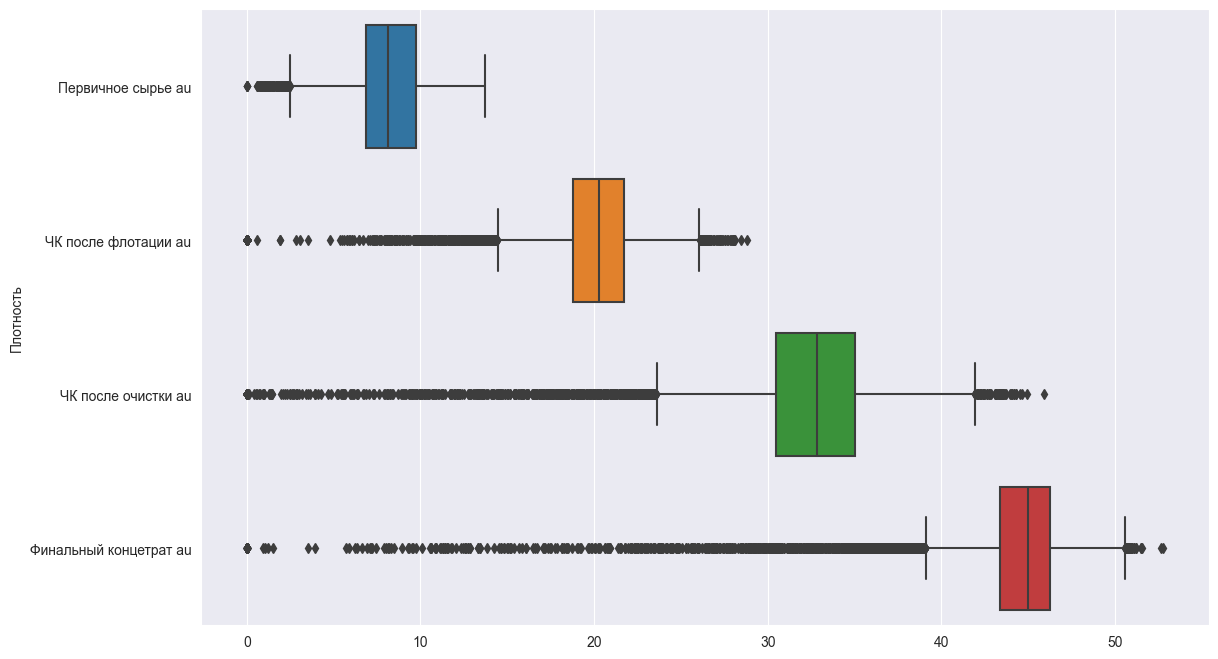

In [139]:
plot_concentrate(metals['золото'])

Концентрация золота на каждом этапе увеличивается. Есть вспелески в районе 0. Ящик с усами показывает что есть выбросы на каждом этапе. выбросы.

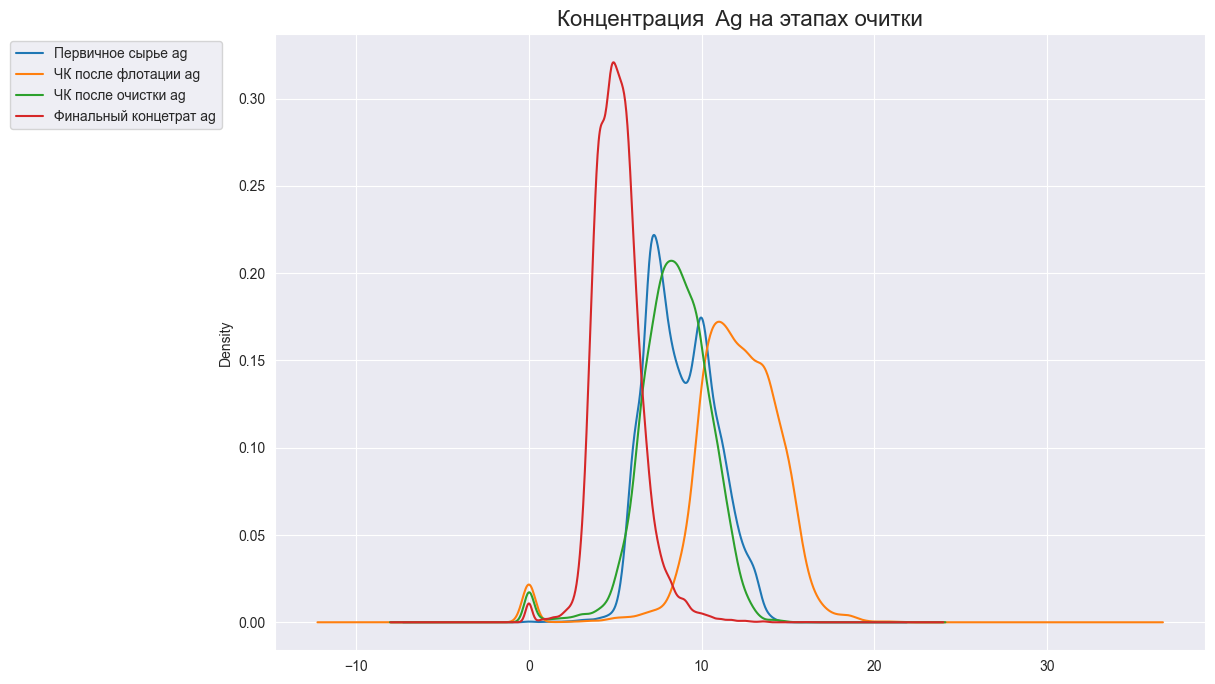

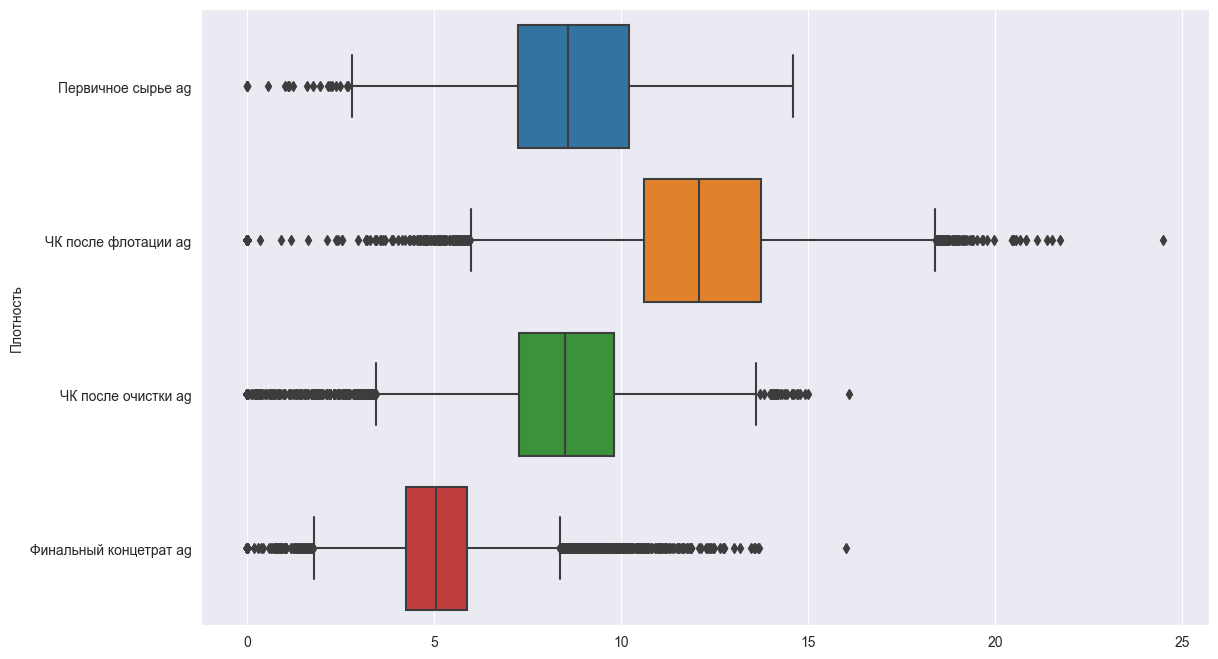

In [140]:
plot_concentrate(metals['серебро'])

Количества серебра на этапе флотации увеличивается, а потом продолжает падать. Есть вспелески в раоне 0. По ящику с усами также видны выбросы.

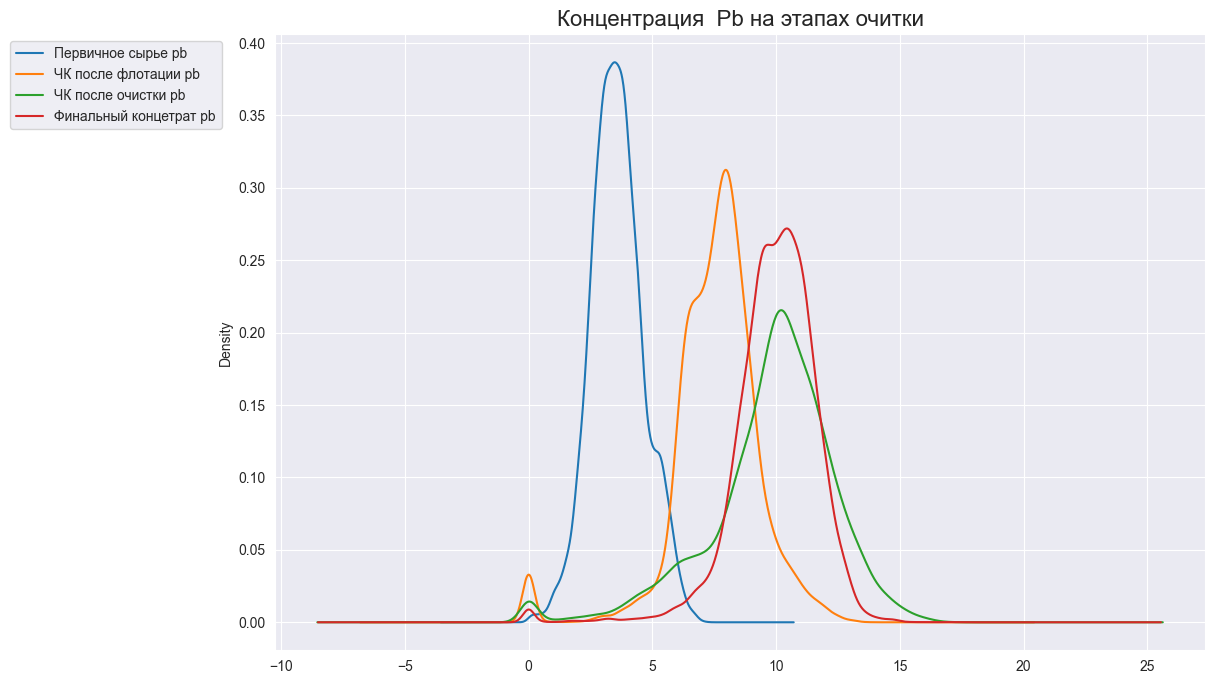

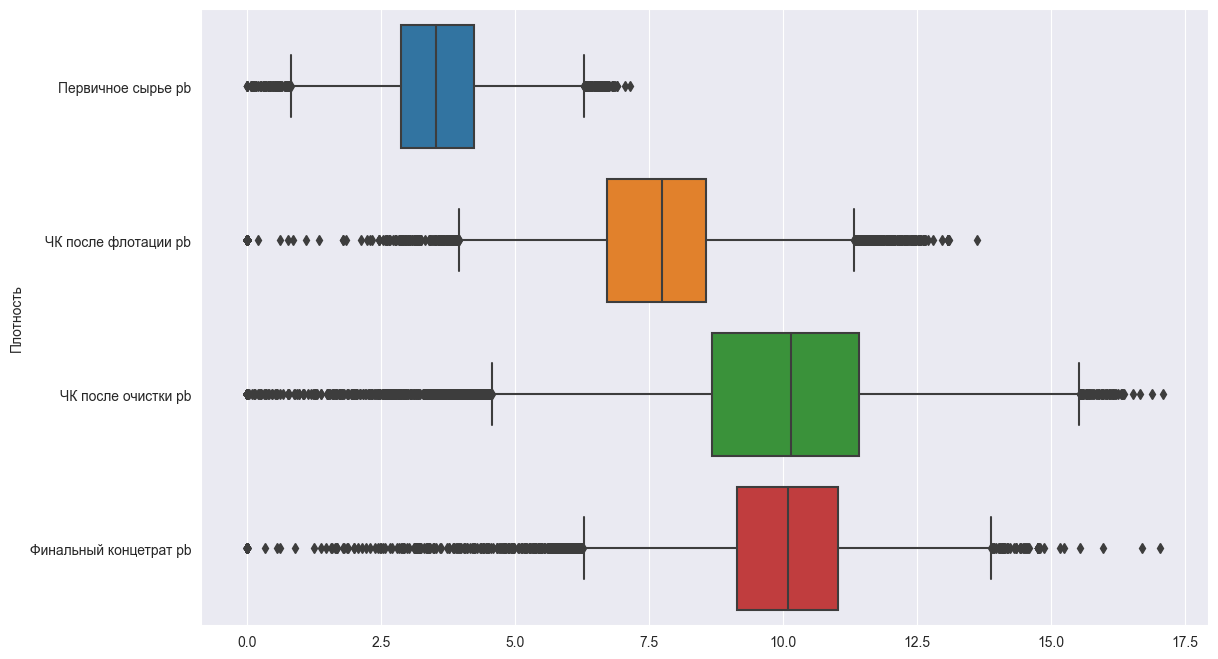

In [141]:
plot_concentrate(metals['свинец'])

Количства свинца по мере очистки только увеличивается. Ящик с усами показывает выбросы.

### Анализ распределения размеров гранул на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Нужна переменная с 'feed size'. Найдем соответсвующий столбец по исходным данным.

In [142]:
display([col for col in df_train.columns if 'feed' and 'size' in col])

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [143]:
display([col for col in df_test.columns if 'feed' and 'size' in col])

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [144]:
# объединим выборки для удобства построения графиков и сравнения
rougher_input_feed_size = pd.concat([df_train['rougher.input.feed_size'], 
                                     df_test['rougher.input.feed_size']], axis=1)

rougher_input_feed_size.columns = ['Размер гранул до флотации ОВ', 'Размер гранул до флотации ТВ']
                                     
primary_cleaner_feed_size = pd.concat([df_train['primary_cleaner.input.feed_size'], 
                                     df_test['primary_cleaner.input.feed_size']], axis=1)
                                     
primary_cleaner_feed_size.columns = ['Размер гранул до очистки ОВ', 'Размер гранул до очистки ТВ']                                     

# выделим два нужных нам столбца для вызова метода describe()
#display(rougher_input_feed_size.describe())

In [145]:
rougher_input_feed_size.describe()

,Размер гранул до флотации ОВ,Размер гранул до флотации ТВ
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


In [146]:
primary_cleaner_feed_size.describe()

,Размер гранул до очистки ОВ,Размер гранул до очистки ТВ
count,14149.000000,5290.000000
mean,7.322310,7.266339
std,0.614062,0.610219
min,1.080000,5.650000
25%,6.960000,6.890000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


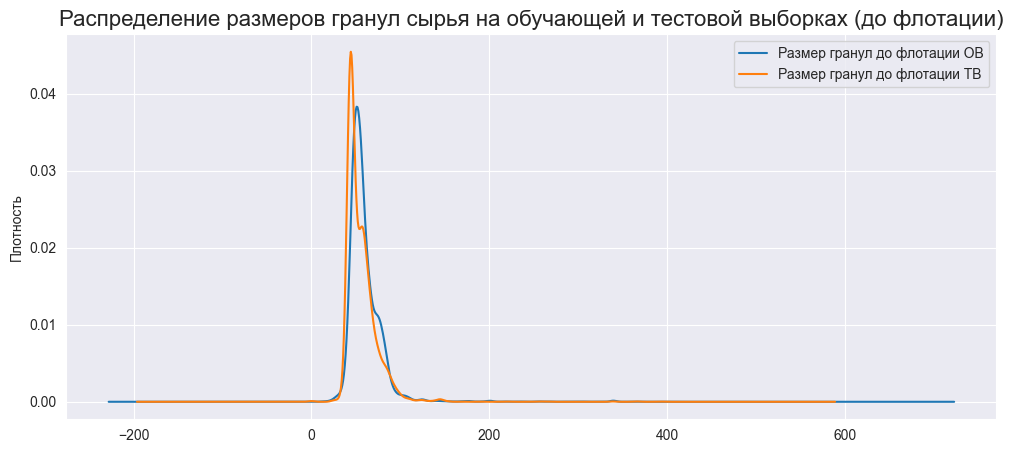

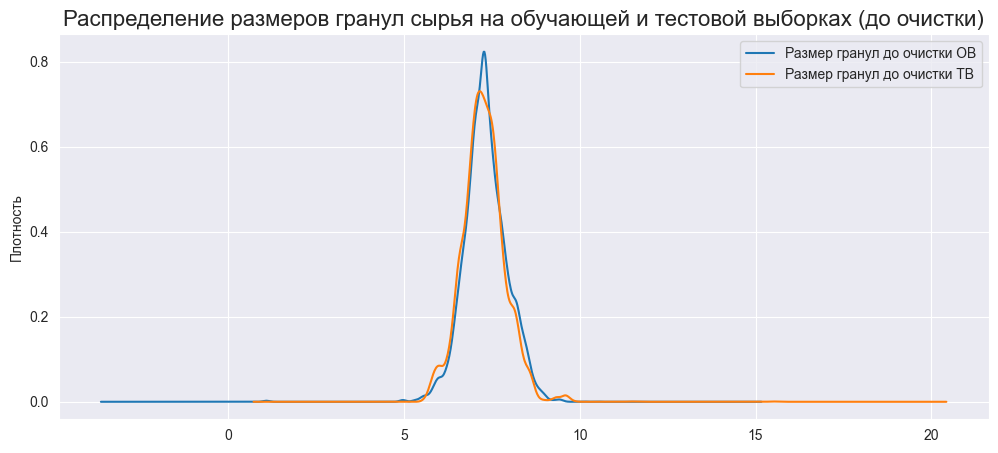

In [147]:
rougher_input_feed_size.plot(kind='kde', figsize=(12,5), grid=True)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (до флотации)', fontsize=16)
plt.ylabel('Плотность')

primary_cleaner_feed_size.plot(kind='kde', figsize=(12,5), grid=True)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (до очистки)', fontsize=16)
plt.ylabel('Плотность')

plt.show()


Оба набора данных схожи, но максимальные значения отличаются.

### Анализ суммарные концентрации


Исследуем суммарную концентрацию всех веществ на разных стадиях обработки: в сырье, в черновом и финальном концентратах.

Добавим столбцы с рачетами суммовых показателей в исходные данные. 

На предварительных этапах 

первичное сырье загружаемое во флотационную установку
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_au
показатели чернового концетрата после флотации
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_au
показатели чернового концетрата после первичной и вторичной очистки
primary_cleaner.output.concentrate_ag',
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_au
показатели финального чернового концетрата после всех этапов очистки
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_au

In [148]:
df_full['Первичное сырье'] = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au']

df_full['Черновой концентрат'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_au']

df_full['Черновой концентрат после очистки'] = df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_au']

df_full['Финальный концентрат'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_au']



In [149]:
df_full[['Первичное сырье', 'Черновой концентрат', 'Черновой концентрат после очистки', 'Финальный концентрат']].head()

,Первичное сырье,Черновой концентрат,Черновой концентрат после очистки,Финальный концентрат
0,14.871440,38.395653,53.111627,58.137072
1,14.905729,38.945647,53.174338,58.699942
2,14.638299,38.649756,52.927464,58.927421
3,14.199305,38.411473,43.979185,58.714815
4,13.511497,38.867359,52.121146,59.065251


In [150]:
df_full[['Первичное сырье', 'Черновой концентрат', 'Черновой концентрат после очистки', 'Финальный концентрат']].describe()

,Первичное сырье,Черновой концентрат,Черновой концентрат после очистки,Финальный концентрат
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,20.646120,39.373032,50.372125,59.223721
std,4.480027,6.863389,7.628095,6.095138
min,0.030000,0.000000,0.000000,0.000000
25%,17.252879,38.394639,50.053899,59.298323
50%,20.141216,40.312648,51.909156,60.306921
75%,23.797381,42.365102,53.386898,61.096667
max,33.498784,55.568687,60.269003,64.968881


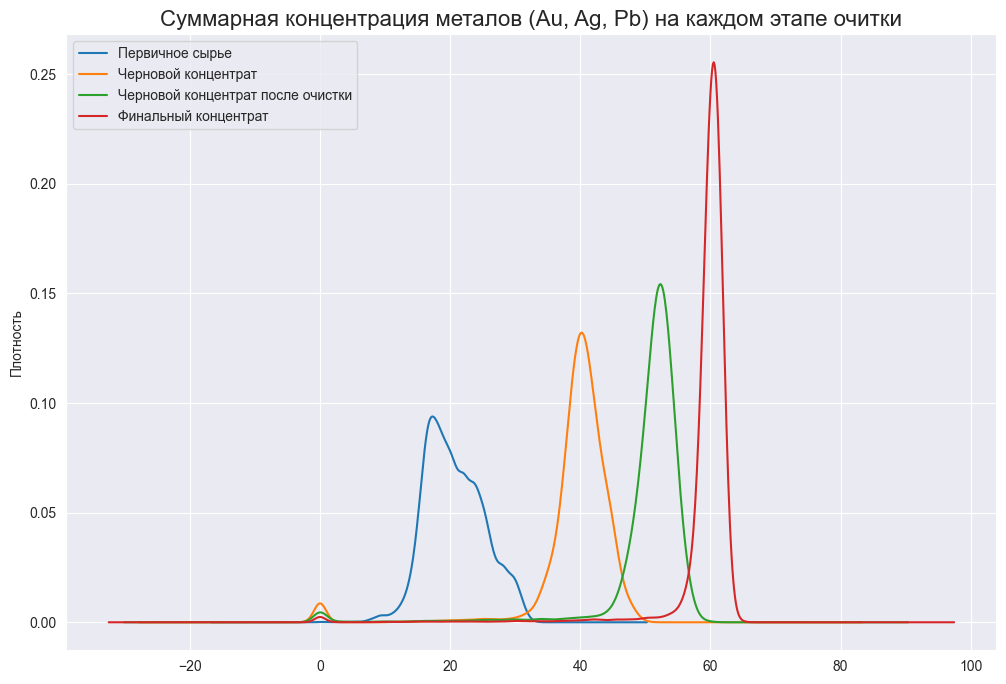

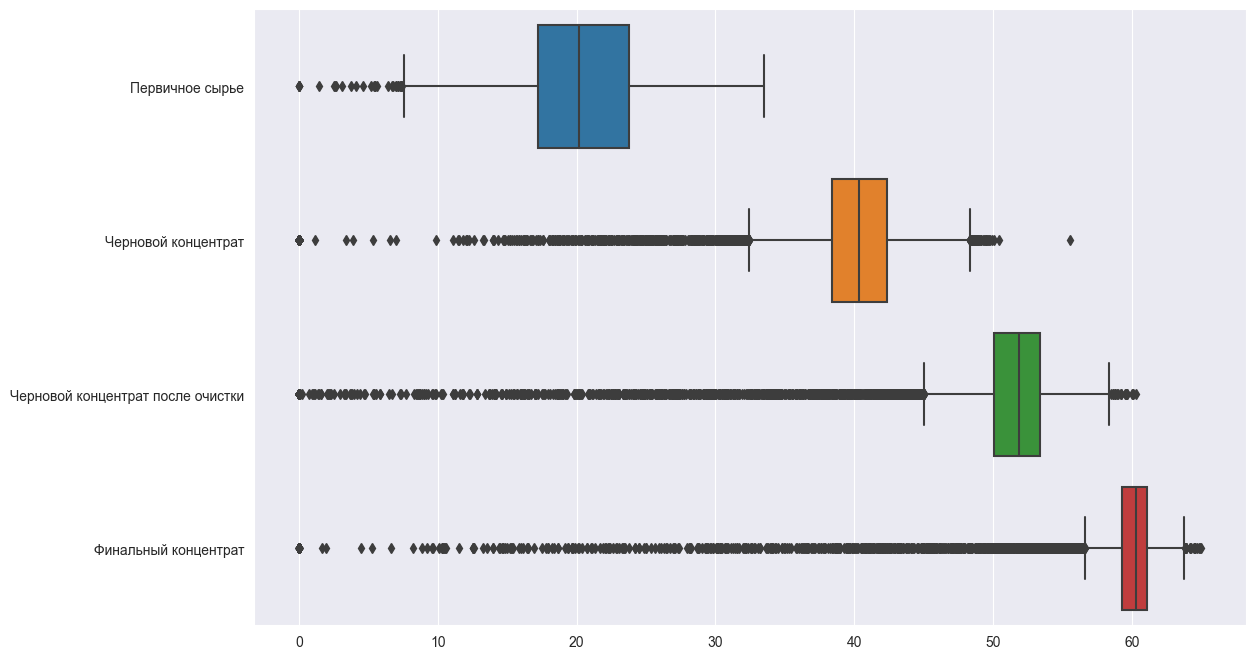

In [151]:
colums = ['Первичное сырье', 'Черновой концентрат', 'Черновой концентрат после очистки', 'Финальный концентрат']
 
    
df_full[colums].plot(kind='kde', figsize=(12,8), grid=True)
plt.ylabel('Плотность')
plt.title('Суммарная концентрация металов (Au, Ag, Pb) на каждом этапе очитки', fontsize=16) 
plt.figure(figsize=(12.8,8))

sns.boxplot(data=df_full[colums], orient="h")
plt.show()

Разброс данных на каждом этапе очистки сокращается. Но число выбросов на каждом этапе увеличивается.

В наших данных присутствуют выбросы (на всех стадиях очистки). Избавимся от них чтобы правильно обучить нашу модель. Присутсвуют нулевые значения в суммарных концентрациях во всех металлах на этапах: черновой концентрат, концентрат после очистки и финальный концентрат. Удалим нулевые элементы, которые могут негативно повлиять на работу модели.

Проверим, сколько объектов, где суммарная концентрация металлом равна 0 и сколько таких, где меньше 1.

In [152]:
for col in colums:
    print(col, ', нулевые значения:', len(df_full[df_full[col] == 0]))
    print(col, ', значения меньше одного:', len(df_full[df_full[col] < 1]))
    print(col, ', значения меньше std:', len(df_full[df_full[col] < np.std(df_full[col])]))
    print()

Первичное сырье , нулевые значения: 0
Первичное сырье , значения меньше одного: 5
Первичное сырье , значения меньше std: 12

Черновой концентрат , нулевые значения: 394
Черновой концентрат , значения меньше одного: 399
Черновой концентрат , значения меньше std: 404

Черновой концентрат после очистки , нулевые значения: 108
Черновой концентрат после очистки , значения меньше одного: 229
Черновой концентрат после очистки , значения меньше std: 264

Финальный концентрат , нулевые значения: 98
Финальный концентрат , значения меньше одного: 99
Финальный концентрат , значения меньше std: 103



In [153]:
display('Размер df_full до удаления ошибок:', df_full.shape)

df_full = df_full[
    (df_full['Первичное сырье'] > 0) & 
    (df_full['Черновой концентрат'] > 0) & 
    (df_full['Черновой концентрат после очистки'] > 0) & 
    (df_full['Финальный концентрат'] > 0)
]

display('Размер df_full после удаления ошибок:', df_full.shape)

'Размер df_full до удаления ошибок:'

(19439, 103)

'Размер df_full после удаления ошибок:'

(18848, 103)

In [154]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,Первичное сырье au,ЧК после флотации au,ЧК после очистки au,Финальный концетрат au,Первичное сырье ag,ЧК после флотации ag,ЧК после очистки ag,Финальный концетрат ag,Первичное сырье pb,ЧК после флотации pb,ЧК после очистки pb,Финальный концетрат pb,Первичное сырье,Черновой концентрат,Черновой концентрат после очистки,Финальный концентрат
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,

In [155]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

In [156]:
df_full[['Первичное сырье', 'Черновой концентрат', 'Черновой концентрат после очистки', 'Финальный концентрат']].describe()

,Первичное сырье,Черновой концентрат,Черновой концентрат после очистки,Финальный концентрат
count,18848.000000,18848.000000,18848.000000,18848.000000
mean,20.625440,40.188296,50.636350,59.522037
std,4.469612,3.896835,6.596385,4.342032
min,0.030000,0.030000,0.030000,0.030000
25%,17.218334,38.526517,50.080931,59.305642
50%,20.123322,40.369255,51.900488,60.300888
75%,23.787051,42.406799,53.351436,61.086969
max,33.498784,55.568687,60.106566,64.968881


In [157]:
# смотрим на размер выборок до переработки
print('Обучающая выборка до очистки', df_train.shape)
print('Тестовая выборка до очистки', df_test.shape)

# создаем выборки
df_train = df_train[df_train['date'].isin(df_full['date'])]
df_test = df_test[df_test['date'].isin(df_full['date'])]

df_train.dropna(inplace=True) # удаляем пропуски
df_test.dropna(inplace=True)  # удаляем пропуски


# смотрим на размер выборок после переработки
print('Обучающая выборка после очистки', df_train.shape)
print('Тестовая выборка после очистки', df_test.shape)

Обучающая выборка до очистки (14149, 55)
Тестовая выборка до очистки (5290, 55)
Обучающая выборка после очистки (13725, 55)
Тестовая выборка после очистки (5123, 55)


## Модель

### Функция для вычисления итоговой sMAPE.

Ранее были полученны следующие данные.

![alternatvie text](https://pictures.s3.yandex.net/resources/smape_1576239058.jpg)

Где: 

y - значение целевого признака 

^y - значение предсказания

Для расчета итоговой метрики необходимы sMAPE 2х переменных:

- эффективность обогащения чернового концентрата 'rougher.output.recovery'

- эффективность обогащения финального концентрата 'final.output.recovery'


![alternatvie text](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

Напишем формулу для расчета sMAPE для каждой из переменных.

In [158]:
def smape(target, predictions):
    numerator = abs(predictions - target)   # вычисляем чилитель
    denominator = (abs(target) + abs(predictions)) / 2   # вычисляем знаменатель
    all_sum = (numerator / denominator).sum()   # вычисляем сумму

    smape = 1 / len(target) * all_sum * 100 # делим на число измерений и переводим в %
    return smape

Напишем функцию для расчета итогового sMAPE.

In [159]:
def smape_overall(smape_rougher, smape_final):
    smape_final = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_final

### Построение моделей прогнозирования

#### Разделение данные на признаки и целевые признаки

In [160]:
# сначала тренировучную 
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']
features_train = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

# потом и тестовую
target_rougher_test = df_test['rougher.output.recovery']
target_final_test = df_test['final.output.recovery']
features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

# проверим
print('Размеры target_rougher_train', target_rougher_train.shape)
print()
print('Размеры target_final_train', target_final_train.shape)
print()
print('Размеры features_train', features_train.shape)
print()
print('Размеры target_rougher_test', target_rougher_test.shape)
print()
print('Размеры target_final_test', target_final_test.shape)
print()
print('Размеры features_test', features_test.shape)

Размеры target_rougher_train (13725,)

Размеры target_final_train (13725,)

Размеры features_train (13725, 52)

Размеры target_rougher_test (5123,)

Размеры target_final_test (5123,)

Размеры features_test (5123, 52)


#### Маштабирование признаков

In [161]:
def st_scaler(data_train, data_test):   
    
    numeric = data_train.columns.tolist()
    

    scaler = StandardScaler()
    scaler.fit(data_train[numeric])
    data_train[numeric] = scaler.transform(data_train[numeric])
    data_test[numeric] = scaler.transform(data_test[numeric])
    
    return data_train, data_test

In [162]:
display('Таблицы до маштабирования признаков')
display(features_train.head())
display(features_test.head())

st_scaler(features_train, features_test)

display('Таблицы после маштабирования признаков')
display(features_train.head())
display(features_test.head())

'Таблицы до маштабирования признаков'

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835,25.942508,-499.176749,23.955516,-499.848796,23.

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986,24.893998,-499.382374,14.916674,-

'Таблицы после маштабирования признаков'

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.173278,0.376744,-0.120145,0.278325,-0.452937,-0.300995,-0.434982,-0.811214,-0.439688,-0.278044,0.050027,-0.219863,-1.306762,-1.113887,0.466367,-0.208911,0.102982,-0.712909,0.085485,0.117092,0.132679,0.142032,-0.737758,-0.356647,1.542301,0.513605,1.418903,0.408056,1.847363,0.253212,1.704947,0.165243,2.162564,0.223824,-0.673908,0.054636,-0.177311,0.028707,-0.943349,-0.316216,-0.148946,-0.255980,-1.057587,-0.474154,-0.650048,-0.755710,-1.185594,-0.381542,-0.870463,-0.428316,-0.963476,-2.681618
1,-0.210699,0.426690,-0.120145,0.315356,-0.247143,-0.357495,-0.247701,-0.323427,-0.244745,-0.296765,0.121848,-0.339149,-1.274642,-1.131206,0.483414,-0.131390,-0.109205,-0.716853,0.080696,0.115045,0.175825,0.147576,-0.734309,-0.314180,1.529868,0.247436,1.409950,0.271194,1.854983,0.277337,1.676808,0.246644,2.067580,0.256104,-0.669162,0.030134,-0.178003,0.045288,-0.941796,-0.404721,-0.119849,-0.258501,-1.061902,-0.533721,-0.678409,-0.697723,-1.166093,-0.430402,-0.886891,-0.431169,-0.990228,-2.517792
2,-0.256989,0.730022,-0.120145,0.285000,-0.049158,-0.331775,-0.061035,-0.345309,-0.050630,-0.341651,0.211347,-0.358565,-1.298260,-1.228823,0.529702,-0.121355,-0.065319,-0.777498,0.064989,0.291370,0.155295,0.304704,-0.737683,-0.314274,1.522060,0.246474,1.406139,0.268972,1.851733,0.277327,1.676560,0.263166,2.070990,0.248867,-0.647584,0.031140,-0.178484,0.052031,-0.951917,-0.392918,0.255005,-0.269331,-1.057907,-0.474804,-0.685574,-0.694328,-1.160657,-0.429328,-0.881850,-0.429512,-0.984928,-2.562171
3,-0.296632,0.731765,-0.120145,0.299577,-0.061537,-0.358823,-0.058953,-0.317858,-0.063313,-0.337550,0.214590,-0.363444,-1.336944,-1.340571,0.652493,-0.109153,0.113770,-0.904683,-0.025211,0.296707,0.093626,0.298113,-0.737116,-0.315612,1.526038,0.235794,1.407745,0.269761,1.841556,0.274161,1.686014,0.261526,2.070522,0.261922,-0.658439,0.043747,-0.166952,0.053685,-0.942455,-0.403314,0.254350,-0.270348,-1.054130,-0.441940,-0.669103,-0.695361,-1.177916,-0.404961,-0.888177,-0.422799,-0.988969,-2.523446
4,-0.406177,0.907655,-0.120145,0.334548,-0.050846,-0.302790,-0.053005,-0.336917,-0.068703,-0.342173,0.222446,-0.375158,-1

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,1.968209,1.823426,1.225537,0.321637,-1.628816,-0.338234,-1.598316,-0.325015,-1.557469,-0.336868,-0.504797,-0.351145,2.410114,1.960911,0.136488,0.103575,1.151413,2.204637,1.618129,0.250974,1.494256,0.260583,-0.725009,0.213921,-0.403967,1.135561,-0.246683,1.176298,-0.072344,1.185565,-0.467827,1.156496,-0.502681,1.176972,-0.832210,0.021740,-1.675562,0.051039,-1.643431,0.507173,-1.741544,0.922189,-1.407831,-0.381460,-1.425186,-0.696997,-1.525304,1.352202,-1.425603,-0.417194,1.231812,0.190028
1,2.085672,1.821747,1.225537,0.282880,-1.630402,-0.333466,-1.606639,-0.320840,-1.586964,-0.294601,-0.502989,-0.371328,2.361307,1.859410,0.139526,0.071163,0.983600,2.118576,1.642861,0.108859,1.529047,0.139166,-0.743805,0.212600,-0.411367,1.120915,-0.247798,1.172098,-0.061713,1.177397,-0.464984,1.157195,-0.499062,1.042105,-0.834760,0.033077,-1.678364,0.039000,-1.648697,0.512348,-1.720334,0.916772,-1.401754,-0.399239,-1.403484,-0.668642,-1.523294,-1.104792,-1.424505,-0.420399,0.937007,0.187051
2,2.082282,1.196503,0.749954,0.297725,-1.632619,-0.356457,-1.600489,-0.320437,-1.572599,-0.378642,-0.503028,-0.356138,2.415319,1.768129,0.134771,0.284969,1.256753,2.208404,1.639753,-0.027712,1.525267,0.017481,-0.744841,0.219415,-0.416627,1.115355,-0.253973,1.146190,-0.065242,1.162133,-0.465395,1.161705,-0.498375,1.129393,-0.837309,0.024870,-1.667372,0.035322,-1.639610,0.509611,-1.723357,0.926247,-1.418582,-0.400655,-1.409955,-0.689086,-1.503934,-0.446997,-1.419957,-0.411834,0.932622,0.165320
3,2.084234,0.935368,0.512163,-0.055241,-1.623850,-0.299618,-1.611339,-0.304111,-1.557273,-0.269075,-0.497428,-0.384819,2.025076,1.482094,0.007718,-0.019472,0.957919,2.255449,1.496812,-0.072524,1.398922,-0.023378,-0.734368,0.215286,-0.395240,1.143460,-0.243173,1.170017,-0.067021,1.221299,-0.454637,1.140428,-0.496006,1.148211,-0.839858,0.040304,-1.680742,0.053469,-1.641135,0.525955,-1.736156,0.929438,-1.406155,-0.392426,-1.414121,-0.665904,-1.533797,-0.448753,-1.415409,-0.415300,0.924589,0.217069
4,1.668853,0.541560,0.333820,-0.209552,-1.610984,-0.354755,-1.606078,-0.312769,-1.542026,-0.339935,-0.503087,-0.348738,1.457575,1.163427,0

#### Поиск наилучшей модели

Найдем на кросс-валидации наилучшую модель среди 3х.

In [163]:
%%time 

random_state = 123
cv = 5 # кросс валидация для 5-ти выборок


# объявим модели для кроссвалидации

models = [DecisionTreeRegressor(random_state = random_state), 
          RandomForestRegressor(random_state = random_state), 
          LinearRegression()]

# переменная в которую будем добавлять информацию по моделям и метрикам
results_cross_val = []

for model in models: 
    
    scorer = make_scorer(smape, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_rougher_train, 
                                              cv=cv, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_final_train, 
                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model name': model, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
display(pd.DataFrame(results_cross_val))

,model name,cross_val_score_rougher,cross_val_score_final
0,DecisionTreeRegressor(random_state=123),-12.661814,-15.697444
1,RandomForestRegressor(random_state=123),-7.097306,-9.714790
2,LinearRegression(),-7.265696,-10.950533


CPU times: user 6min 20s, sys: 21.9 s, total: 6min 41s
Wall time: 6min 17s


#### Поиск гиперпараметров наилучшей модели

RandomForestRegressor показал наилучшие результаты, подберем через цикл n_estimators и max_depth.

In [165]:
%%time 
results = []

for depth in range(1,10):
    
    for estimator in range(10, 31, 5):
        
        model = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        # для оценки модели воспользуемся SMAPE (принцип - чем меньще тем лучше)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=cv, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=cv, scoring=scorer).mean()

        smape_final_result = smape_overall(cross_val_score_rougher, cross_val_score_final)
        
        # соберем результаты в таблицу
        
        results.append({'model name': model.__class__.__name__, 
                        'Hyperparameters': {'random_state': random_state, 
                                            'n_estimators': estimator, 
                                            'max_depth':depth}, 
                        'smape_final_result': smape_final_result})

display(pd.DataFrame(results).style.highlight_max(color = 'red', axis = 0)) # подкрасим нужное


TypeError: '>=' not supported between instances of 'dict' and 'dict'

CPU times: user 18min 14s, sys: 5.13 s, total: 18min 19s
Wall time: 18min 20s


In [172]:
%%time 
results = []

for depth in range(5,6):
    
    for estimator in range(30, 31):
        
        model = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        # для оценки модели воспользуемся SMAPE (принцип - чем меньще тем лучше)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=cv, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=cv, scoring=scorer).mean()

        smape_final_result = smape_overall(cross_val_score_rougher, cross_val_score_final)
        
        # соберем результаты в таблицу
        
        results.append({'model name': model.__class__.__name__, 
                        'Hyperparameters': {'random_state': random_state, 
                                            'n_estimators': estimator, 
                                            'max_depth':depth}, 
                        'smape_final_result': smape_final_result})

display(pd.DataFrame(results).style.highlight_max(color = 'red', axis = 0)) # подкрасим нужное

,model name,Hyperparameters,smape_final_result
0,RandomForestRegressor,"{'random_state': 123, 'n_estimators': 30, 'max_depth': 5}",-8.532637


CPU times: user 37.4 s, sys: 214 ms, total: 37.6 s
Wall time: 37.6 s


In [ ]:
%%time 
results = []

for max_depth in range(5,6):
    
    for estimator in range(30, 31):
        
        model = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=estimator, 
                                       max_depth=max_depth)
        
        # для оценки модели воспользуемся SMAPE (принцип - чем меньще тем лучше)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=cv, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=cv, scoring=scorer).mean()

        smape_final_result = smape_overall(cross_val_score_rougher, cross_val_score_final)
        
        # соберем результаты в таблицу
        
        results.append({'model name': model.__class__.__name__, 
                        'Hyperparameters': {'random_state': random_state, 
                                            'n_estimators': estimator, 
                                            'max_depth':depth}, 
                        'smape_final_result': smape_final_result})

display(pd.DataFrame(results).style.highlight_max(color = 'red', axis = 0)) # подкрасим нужное



In [175]:
from sklearn.model_selection import GridSearchCV

In [180]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4,5,6],
}
regr = RandomForestRegressor(random_state=123)

clf = GridSearchCV(regr, parameters)
clf.fit(features_train, target_rougher_train)

clf.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [181]:

# для оценки модели воспользуемся SMAPE (принцип - чем меньще тем лучше)
        
scorer = make_scorer(smape, greater_is_better=False) 
    
cross_val_score_rougher = cross_val_score(clf, features_train, target_rougher_train, cv=cv, scoring=scorer).mean()
cross_val_score_final = cross_val_score(clf, features_train, target_final_train, cv=cv, scoring=scorer).mean()

smape_final_result = smape_overall(cross_val_score_rougher, cross_val_score_final)
        
# соберем результаты в таблицу
        
results.append({'model name': clf.__class__.__name__, 
        'Hyperparameters': {'random_state': random_state, 
                                    'n_estimators': estimator, 
                                    'max_depth':depth}, 
                'smape_final_result': smape_final_result})

display(pd.DataFrame(results).style.highlight_max(color = 'red', axis = 0)) # подкрасим нужное



Лучшие показатели дала модель RandomForestRegressor с n_estimators=30, max_depth=5. Применим эти параметры чтобы обучить модель. 

In [166]:
model_final = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=30, 
                                       max_depth=5)

model_final.fit(features_train, target_rougher_train)
predictions_rougher = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_final = model_final.predict(features_test)

Модель обучена на предсказание 2 целевых признаков.

#### Сравнение реальных данных и предсказаний

Посмотрим на график KDE как выглядят реальные данные и предсказанные по тестовой выборке.

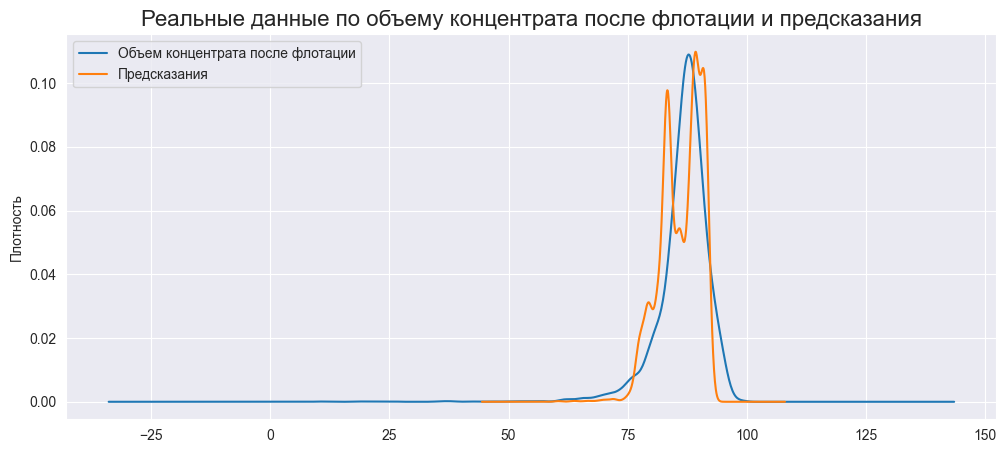

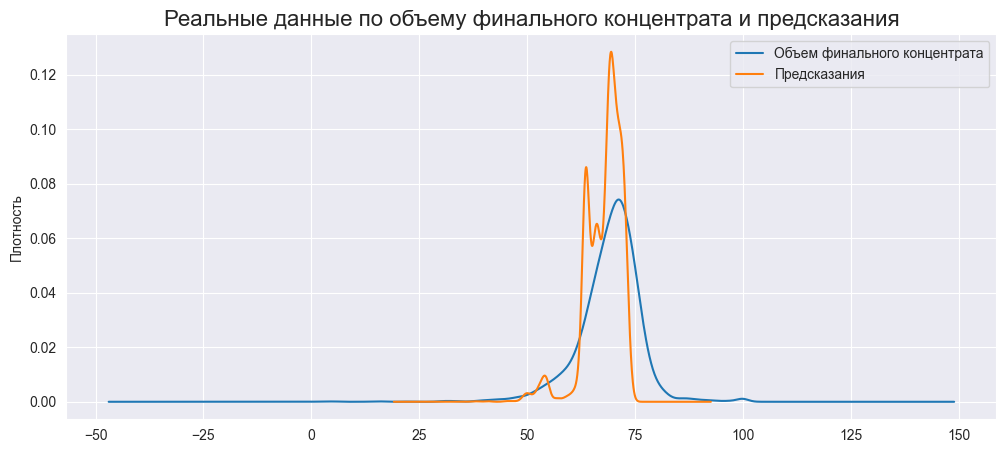

In [167]:
# объединим реальные данные и предсказания в таблицы для удобства построения графиков

rougher_output_test_pred = pd.DataFrame(
    {'Объем концентрата после флотации': target_rougher_test,
     'Предсказания': predictions_rougher,
     })

final_output_test_pred = pd.DataFrame(
    {'Объем финального концентрата': target_final_test,
     'Предсказания': predictions_final,
     })

rougher_output_test_pred.plot(kind='kde', figsize=(12,5), grid=True)
plt.title('Реальные данные по объему концентрата после флотации и предсказания', fontsize=16)
plt.ylabel('Плотность')

final_output_test_pred.plot(kind='kde', figsize=(12,5), grid=True)
plt.title('Реальные данные по объему финального концентрата и предсказания', fontsize=16)
plt.ylabel('Плотность')

plt.show()

В предсказании намного больше больших значений. Проверим sMAPE.

#### Расчет sMAPE итоговый

In [168]:
smape_rougher = smape(target_rougher_test, predictions_rougher)
smape_final = smape(target_final_test, predictions_final)

# воспользуемся ранее написанной функцией
print('Итоговое sMAPE на тестовой выборке:', smape_overall(smape_rougher, smape_final), '%') 

Итоговое sMAPE на тестовой выборке: 7.341964575346477 %


In [169]:
# cсоздаем соотвесвующую модель предсказания среднего значения признака
dr = DummyRegressor(strategy='mean')

# обучаем модель для этапа флотации<div class="alert alert-block alert-warning">

dr.fit(features_train, target_rougher_train)

# считаем предсказание этапа флотации
predictions_rougher_dr = dr.predict(features_test)

# обучаем модель для финального этапа
dr.fit(features_train, target_final_train)

# считаем предсказание для финального этапа
predictions_final_dr = dr.predict(features_test)

# Вычислим значения метрик smape на моделе DummyRegressor

smape_rougher_dr = smape(target_rougher_test, predictions_rougher_dr)
smape_final_dr = smape(target_final_test, predictions_final_dr)

print('Итоговое sMAPE', smape_overall(smape_rougher_dr, smape_final_dr))

Итоговое sMAPE 7.778089380065631


Ошибка простейшей модели составила чуть больше 10%, разница между ошибкой по тестовой выборке минимальна, модель адекватна.

## Вывод

- На этапе подготовки данных загрузили 3 исходную, обучающую и тестовую выборку.  Изучили данные, пропуски, нашли признаки неверного формата, проверили на дубликаты.
- Проверили корректность расчета формулы эффективности обогащения руды, данные расчитаны верно.
- Нашли и рассмотрели признаки отсутвующие в тестовой выборке.
- На этапе предоработки: исправили типы данных, удалили пропуски, добавили целевые признаки в тестовую выборку, выровнили по числу признаков обучающую и тестовую выборку, рассмотрели корреляцию признаков.
- Провели исследование изменения концентрации элементов (Au - золото, Ag - серебро, Pb - свинец) на каждом этапе, по мере очистки сырья концентрация золота увеличивается, серебра падает, свинца увеличивается.
- Проанализировали размер гранул на обучающей и тестовой выборках и выявили что данные схожи.
- Проанализировали суммарные концентраты металов на всех этапах и выявили, что концентрация металов по мере очистки растет, волотильность показателя падает, но количство выбросов уведичивается.
- Написали фукции для вычисления sMAPE и итоговой sMAPE.
- Перед поиском наилучшей модели разделили данные на признаки и целевые признаки 
- Проверили маштабирования признаков
- Нашли наилучшую модель.
- Нашли гиперпараметры наилучшей модели.
- Сравнили по графику KDE как соотносятся реальные данные с предсказаниями.
- Вычислили итоговой sMAPE, ошибка обученной модели составила чуть меньше 10%. 
- Проверили модель на адекватность, ошибка простейшей модели составила чуть больше 10%, что говорит о том, что модель адекватна.